In [ ]:
# Download data from Google Storage (already preformatted)
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py


from  helper_functions import create_tensorboard_callback,compare_historys, plot_loss_curves, unzip_data, walk_through_dir
import zipfile



!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2024-05-03 10:42:05--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-03 10:42:05 (46.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]

--2024-05-03 10:42:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.207, 173.194.196.207, 173.194.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_toast'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hummus'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/peking_duck'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/nachos'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/donuts'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spring_rolls'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/onion_rings'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/macaroni_and_cheese'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/falafel'.
There are 0 directories and 75 images in '101_foo

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            shuffle= False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
efficientrel_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = base_model(inputs)
print(f"shape after base model: {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")
outputs = tf.keras.layers.Dense(101, activation="softmax",name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_10_percent = model.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data= test_data,
                                 validation_steps=int(0.25*len(test_data)))

24274472/24274472 [==============================] - 0s 0us/step
shape after base model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
237/237 [==============================] - 41s 125ms/step - loss: 3.2192 - accuracy: 0.3085 - val_loss: 2.1806 - val_accuracy: 0.5320
Epoch 2/5
237/237 [==============================] - 27s 111ms/step - loss: 1.9523 - accuracy: 0.5650 - val_loss: 1.7409 - val_accuracy: 0.5880
Epoch 3/5
237/237 [==============================] - 26s 110ms/step - loss: 1.5623 - accuracy: 0.6409 - val_loss: 1.5588 - val_accuracy: 0.6163
Epoch 4/5
237/237 [==============================] - 28s 114ms/step - loss: 1.3244 - accuracy: 0.6908 - val_loss: 1.4729 - val_accuracy: 0.6223
Epoch 5/5
237/237 [==============================] - 27s 113ms/step - loss: 1.1637 - accuracy: 0.7279 - val_loss: 1.4246 - val_accuracy: 0.6260


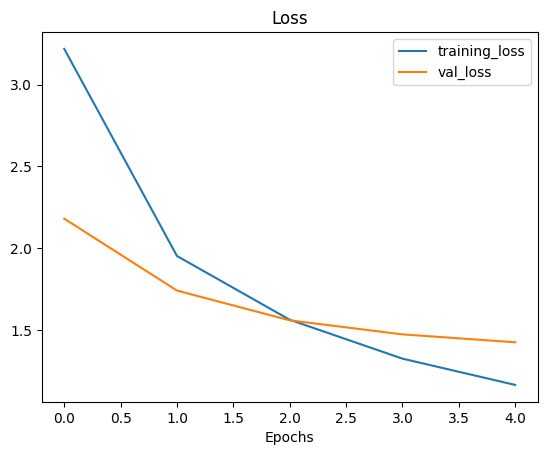

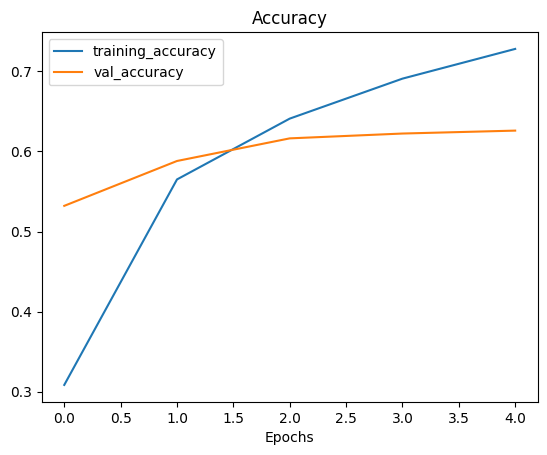

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    #preprocesing.Rescaling(1./255) keep for ResNet50v2, remove for EfficientNetv2b0
], name= "data_augmention")

(-0.5, 416.5, 248.5, -0.5)

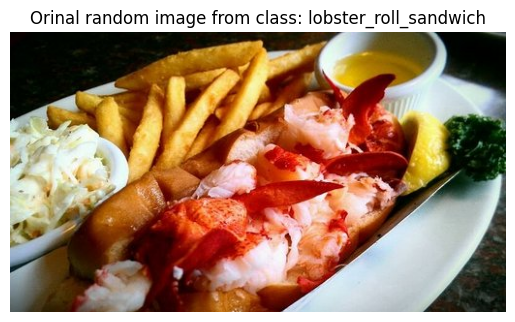

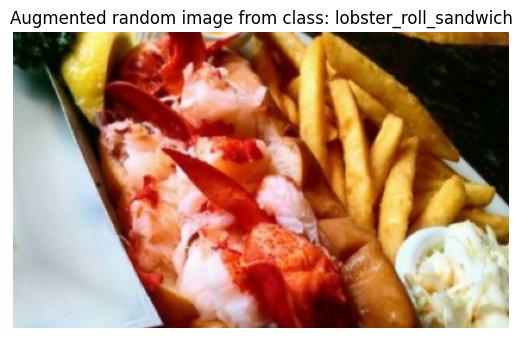

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_10_percent.class_names)
target_dir = "/content/101_food_classes_10_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Orinal random image from class: {target_class}")
plt.axis(False) #turn off axes

#Augmented
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [ ]:
input_shape = (224,224,3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
#create a input
inputs = layers.Input(shape= input_shape, name="input_layer")

#add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

#give base_model inputs (after augmention) and don't train it
x = base_model(x, training=False)

#pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#put a dense layer on as the output
outputs = layers.Dense(101, activation="softmax", name="output_layer")(x)

#make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

#fit the model
history_10_percent= model_1.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)), #validate for less steps
                                #track model trainig logs
                                callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240503-095331
Epoch 1/5
237/237 [==============================] - 142s 569ms/step - loss: 3.5432 - accuracy: 0.2396 - val_loss: 2.4694 - val_accuracy: 0.4443
Epoch 2/5
237/237 [==============================] - 113s 475ms/step - loss: 2.4333 - accuracy: 0.4440 - val_loss: 1.9655 - val_accuracy: 0.5292
Epoch 3/5
237/237 [==============================] - 97s 405ms/step - loss: 2.0600 - accuracy: 0.5118 - val_loss: 1.7810 - val_accuracy: 0.5503
Epoch 4/5
237/237 [==============================] - 96s 403ms/step - loss: 1.8386 - accuracy: 0.5549 - val_loss: 1.6731 - val_accuracy: 0.5663
Epoch 5/5
237/237 [==============================] - 86s 363ms/step - loss: 1.6900 - accuracy: 0.5842 - val_loss: 1.6150 - val_accuracy: 0.5779


In [ ]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True)

In [ ]:
for layer in base_model.layers[-5:]:
  layer.trainable = True

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
fine_tune_epochs =10

history_all_classes_10_percent_fine_tune = model.fit(train_data_10_percent,
                                epochs = fine_tune_epochs,
                                initial_epoch = history_10_percent.epoch[-1],
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)))

Epoch 5/10
237/237 [==============================] - 36s 152ms/step - loss: 0.9334 - accuracy: 0.7894 - val_loss: 1.6171 - val_accuracy: 0.5693
Epoch 6/10
237/237 [==============================] - 28s 115ms/step - loss: 0.8513 - accuracy: 0.8051 - val_loss: 1.5830 - val_accuracy: 0.5766
Epoch 7/10
237/237 [==============================] - 38s 157ms/step - loss: 0.7737 - accuracy: 0.8272 - val_loss: 1.5743 - val_accuracy: 0.5807
Epoch 8/10
237/237 [==============================] - 44s 184ms/step - loss: 0.7115 - accuracy: 0.8437 - val_loss: 1.5587 - val_accuracy: 0.5833
Epoch 9/10
237/237 [==============================] - 36s 152ms/step - loss: 0.6566 - accuracy: 0.8631 - val_loss: 1.5824 - val_accuracy: 0.5792
Epoch 10/10
237/237 [==============================] - 35s 148ms/step - loss: 0.6029 - accuracy: 0.8717 - val_loss: 1.5655 - val_accuracy: 0.5839


In [ ]:
result = model

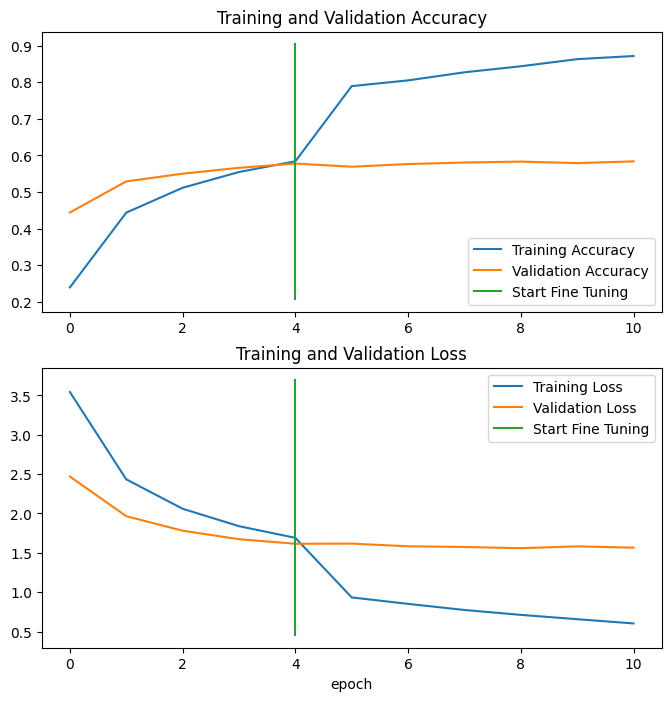

In [ ]:
compare_historys(original_history = history_10_percent,
                 new_history = history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [ ]:
pred_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 62s 75ms/step


In [ ]:
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
pred_probs[0]

array([2.57648155e-03, 1.87699698e-05, 3.94237965e-01, 7.49634319e-06,
       1.62821088e-04, 1.13892704e-04, 4.32914021e-06, 9.01053936e-05,
       6.04542845e-04, 1.89954546e-04, 2.41805483e-05, 1.86717676e-04,
       1.05471241e-04, 1.45596685e-04, 1.44055635e-02, 3.91999185e-02,
       7.06542924e-04, 1.67966849e-04, 2.06073211e-03, 2.73800758e-03,
       1.92631327e-03, 2.43665017e-05, 4.92078871e-05, 1.81181167e-05,
       4.61251882e-04, 2.20445674e-02, 2.03852635e-03, 1.12453046e-04,
       1.68376919e-02, 6.09785966e-05, 1.64661037e-06, 8.93842371e-05,
       1.60002022e-03, 4.51411870e-05, 6.10135845e-04, 3.71245478e-05,
       1.00131379e-03, 4.57935676e-04, 2.36628633e-02, 1.77899166e-03,
       4.22251847e-04, 1.90783606e-03, 1.81351686e-04, 4.60453943e-04,
       1.88431033e-04, 2.61137058e-04, 2.36273656e-04, 5.20458088e-05,
       3.51141389e-05, 9.53110680e-03, 7.67107261e-03, 3.47365043e-04,
       5.04022278e-02, 3.14272218e-03, 1.09359880e-05, 1.06430845e-03,
      

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([ 2,  0,  0,  0,  0, 78, 29, 46,  0, 41])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
pred_classes[:10]

array([ 2,  0,  0,  0,  0, 78, 29, 46,  0, 41])

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy


0.6432079207920792

In [ ]:
len(y_labels), len(pred_classes)

(25250, 25250)

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)


  # ax.xaxis.set_label_position("bottom")
  # ax.xaxis.tick_bottom()


  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)


  threshold = (cm.max() + cm.min()) / 2.


  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.44      0.26      0.32       250
           1       0.70      0.64      0.67       250
           2       0.60      0.66      0.63       250
           3       0.60      0.67      0.63       250
           4       0.60      0.47      0.53       250
           5       0.52      0.56      0.54       250
           6       0.88      0.68      0.77       250
           7       0.82      0.82      0.82       250
           8       0.37      0.51      0.43       250
           9       0.50      0.68      0.57       250
          10       0.57      0.48      0.52       250
          11       0.67      0.69      0.68       250
          12       0.72      0.68      0.70       250
          13       0.58      0.60      0.59       250
          14       0.54      0.56      0.55       250
          15       0.48      0.36      0.41       250
          16       0.67      0.56      0.61       250
          17       0.42    

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.43537414965986393,
  'recall': 0.256,
  'f1-score': 0.3224181360201511,
  'support': 250},
 '1': {'precision': 0.7,
  'recall': 0.644,
  'f1-score': 0.6708333333333334,
  'support': 250},
 '2': {'precision': 0.5978260869565217,
  'recall': 0.66,
  'f1-score': 0.6273764258555133,
  'support': 250},
 '3': {'precision': 0.6,
  'recall': 0.672,
  'f1-score': 0.6339622641509434,
  'support': 250},
 '4': {'precision': 0.6,
  'recall': 0.468,
  'f1-score': 0.5258426966292135,
  'support': 250},
 '5': {'precision': 0.5245283018867924,
  'recall': 0.556,
  'f1-score': 0.5398058252427184,
  'support': 250},
 '6': {'precision': 0.8808290155440415,
  'recall': 0.68,
  'f1-score': 0.7674943566591422,
  'support': 250},
 '7': {'precision': 0.82, 'recall': 0.82, 'f1-score': 0.82, 'support': 250},
 '8': {'precision': 0.3688760806916426,
  'recall': 0.512,
  'f1-score': 0.42881072026800665,
  'support': 250},
 '9': {'precision': 0.49707602339181284,
  'recall': 0.68,
  'f1-score':

In [ ]:
class_f1_scores = {}
for k , v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.3224181360201511,
 'baby_back_ribs': 0.6708333333333334,
 'baklava': 0.6273764258555133,
 'beef_carpaccio': 0.6339622641509434,
 'beef_tartare': 0.5258426966292135,
 'beet_salad': 0.5398058252427184,
 'beignets': 0.7674943566591422,
 'bibimbap': 0.82,
 'bread_pudding': 0.42881072026800665,
 'breakfast_burrito': 0.5743243243243243,
 'bruschetta': 0.521551724137931,
 'caesar_salad': 0.6785009861932938,
 'cannoli': 0.7037037037037037,
 'caprese_salad': 0.592156862745098,
 'carrot_cake': 0.5507812499999999,
 'ceviche': 0.41013824884792627,
 'cheese_plate': 0.6069868995633187,
 'cheesecake': 0.4041666666666667,
 'chicken_curry': 0.5320665083135392,
 'chicken_quesadilla': 0.6513409961685823,
 'chicken_wings': 0.7385229540918163,
 'chocolate_cake': 0.5377358490566039,
 'chocolate_mousse': 0.40977443609022557,
 'churros': 0.7383966244725738,
 'clam_chowder': 0.7663551401869159,
 'club_sandwich': 0.706959706959707,
 'crab_cakes': 0.5027322404371585,
 'creme_brulee': 0.7642276422

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_names  f1-score
33              edamame  0.967871
63             macarons  0.919588
91  spaghetti_carbonara  0.880000
51            guacamole  0.860000
75                  pho  0.858351

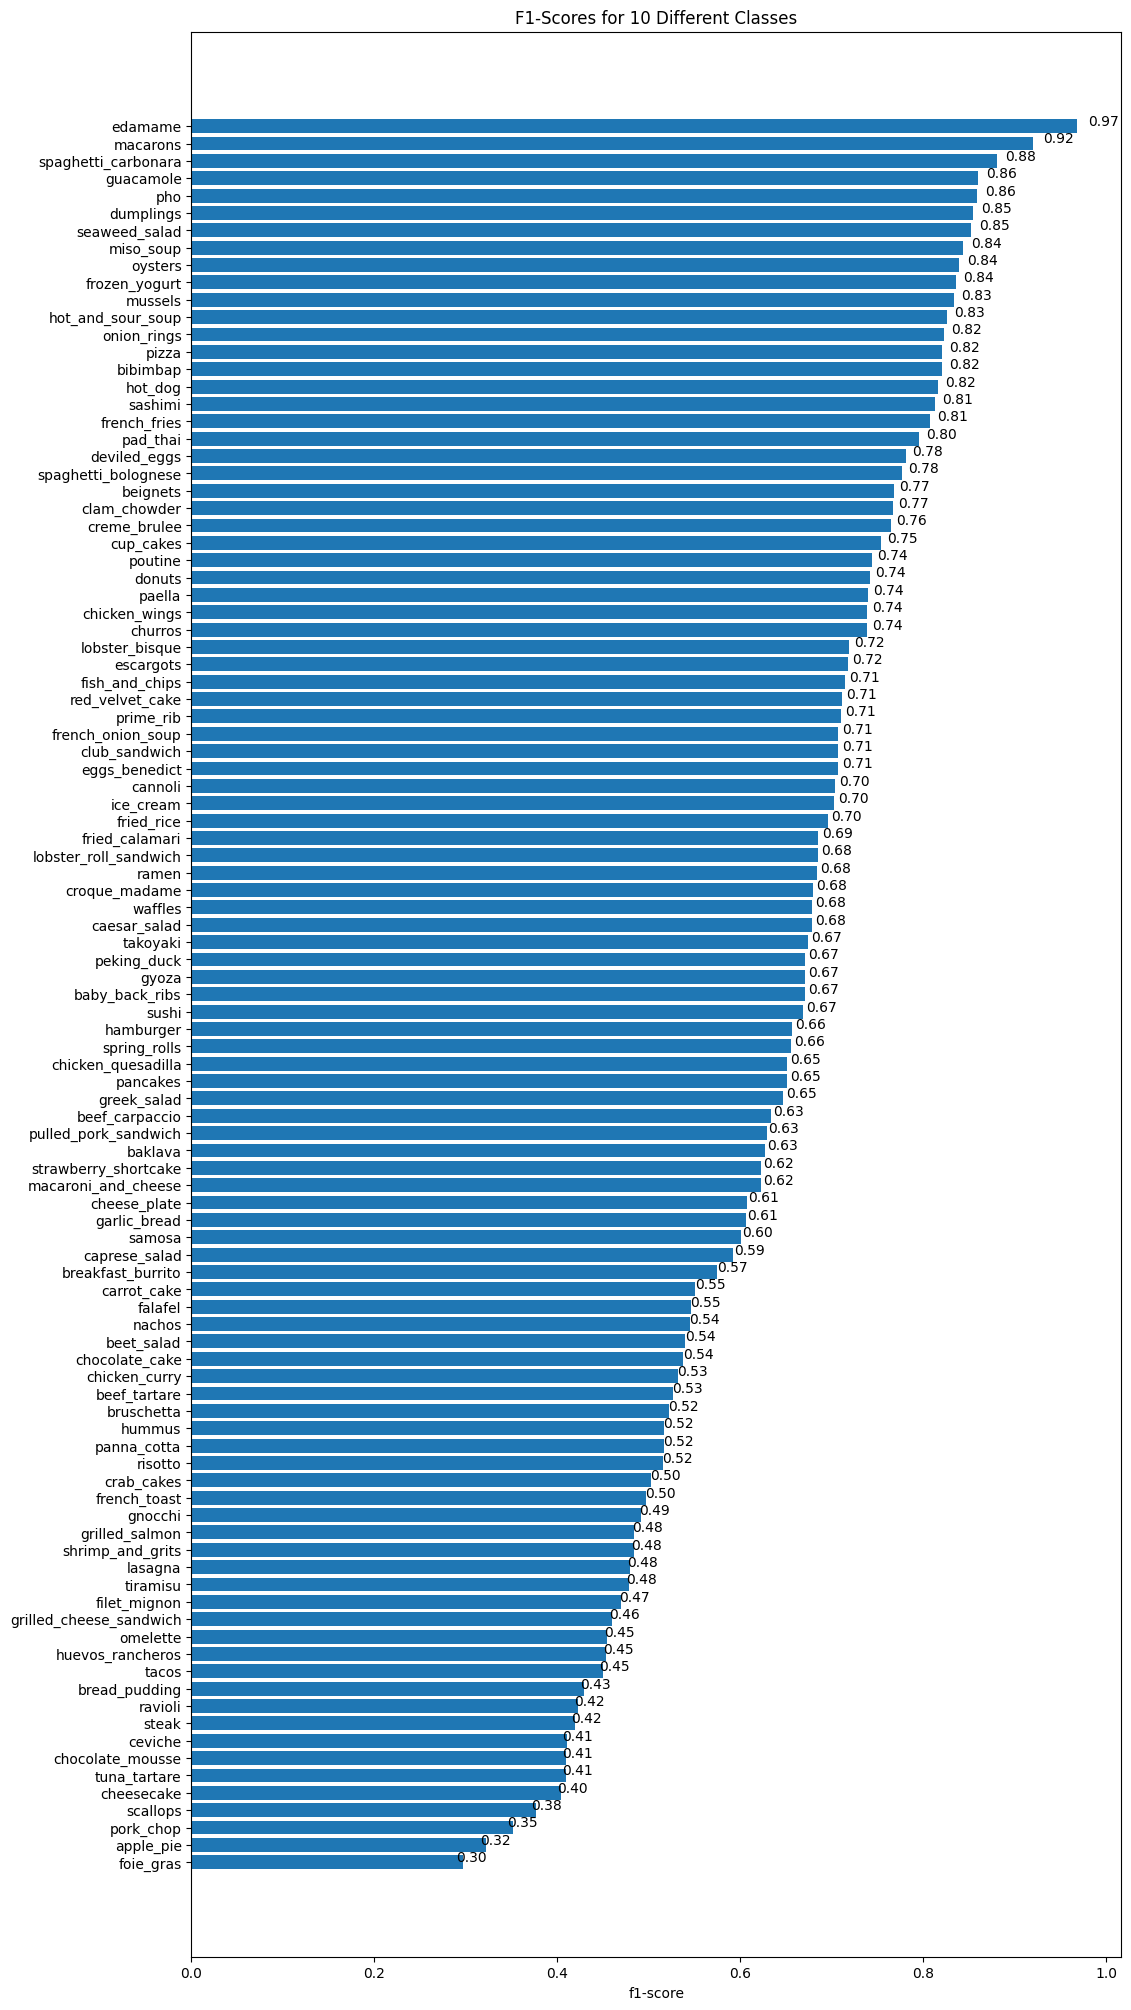

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_names"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis();

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
def load_and_pred_image(filename, img_shape=224, scale=True):
  img= tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 48ms/step


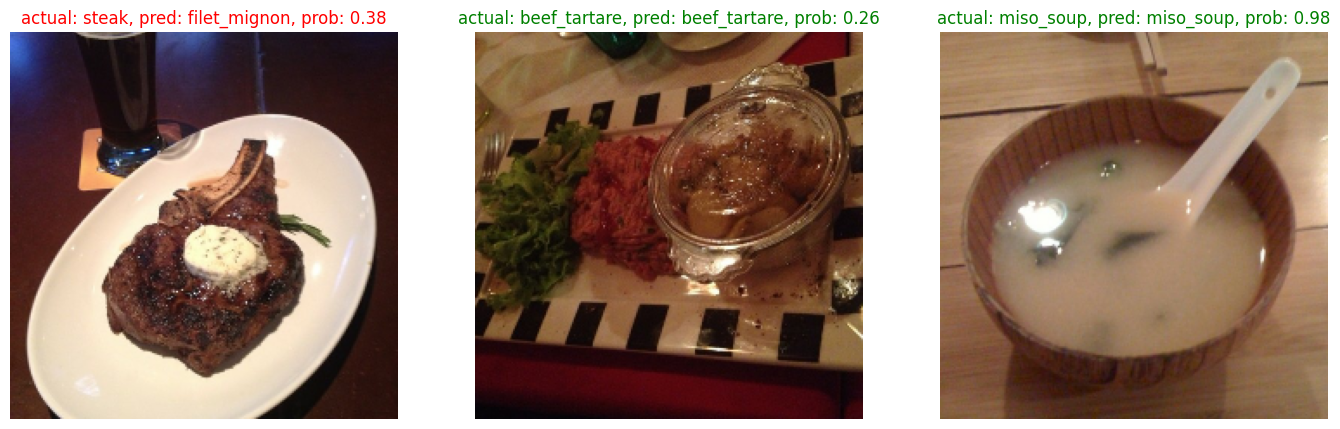

In [ ]:
import os
import random

plt.figure(figsize=(17,10))
for i in range(3):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir+"/" + class_name))
  filepath = test_dir + class_name + '/' + filename

  img = load_and_pred_image(filepath, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]


  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = 'g'
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c = title_color)
  plt.axis(False)


In [ ]:
filepaths = []

for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle = False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1),
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0       2   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0       0   
4  b'/content/101_food_classes_10_percent/test/ap...       0       0   

   pred_conf y_true_classname y_pred_classname  
0   0.394238        apple_pie          baklava  
1   0.375415        apple_pie        apple_pie  
2   0.300936        apple_pie        apple_pie  
3   0.197772        apple_pie        apple_pie  
4   0.376365        apple_pie        apple_pie

In [ ]:
pred_df["pred_correct"] = pred_df["y_true_classname"] == pred_df["y_pred_classname"]
pred_df

img_path  y_true  y_pred  \
0      b'/content/101_food_classes_10_percent/test/ap...       0       2   
1      b'/content/101_food_classes_10_percent/test/ap...       0       0   
2      b'/content/101_food_classes_10_percent/test/ap...       0       0   
3      b'/content/101_food_classes_10_percent/test/ap...       0       0   
4      b'/content/101_food_classes_10_percent/test/ap...       0       0   
...                                                  ...     ...     ...   
25245  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25246  b'/content/101_food_classes_10_percent/test/wa...     100     100   
25247  b'/content/101_food_classes_10_percent/test/wa...     100      56   
25248  b'/content/101_food_classes_10_percent/test/wa...     100      94   
25249  b'/content/101_food_classes_10_percent/test/wa...     100      23   

       pred_conf y_true_classname      y_pred_classname  pred_correct  
0       0.394238        apple_pie               baklava         False  
1       0.375415        apple_pie             apple_pie          True  
2       0.300936        apple_pie             apple_pie          True  
3       0.197772        apple_pie             apple_pie          True  
4       0.376365        apple_pie             apple_pie          True  
...          ...              ...                   ...           ...  
25245   0.715241          waffles               waffles          True  
25246   0.972143          waffles               waffles          True  
25247   0.792301          waffles      huevos_rancheros         False  
25248   0.396313          waffles  strawberry_shortcake         False  
25249   0.230941          waffles               churros         False  

[25250 rows x 7 columns]

In [ ]:
m = pred_df[pred_df["pred_correct"] == False]
m.sort_values('pred_conf',ascending=False)

img_path  y_true  y_pred  \
23797  b'/content/101_food_classes_10_percent/test/su...      95      86   
14375  b'/content/101_food_classes_10_percent/test/hu...      57      27   
8982   b'/content/101_food_classes_10_percent/test/es...      35      31   
17908  b'/content/101_food_classes_10_percent/test/pa...      71      65   
10880  b'/content/101_food_classes_10_percent/test/fr...      43      68   
...                                                  ...     ...     ...   
19708  b'/content/101_food_classes_10_percent/test/po...      78      28   
14029  b'/content/101_food_classes_10_percent/test/hu...      56      11   
25161  b'/content/101_food_classes_10_percent/test/wa...     100      50   
1147   b'/content/101_food_classes_10_percent/test/be...       4      30   
2090   b'/content/101_food_classes_10_percent/test/br...       8      19   

       pred_conf  y_true_classname    y_pred_classname  pred_correct  
23797   0.997133             sushi             sashimi         False  
14375   0.993300            hummus        creme_brulee         False  
8982    0.989979         escargots              donuts         False  
17908   0.989354            paella             mussels         False  
10880   0.989043    fried_calamari         onion_rings         False  
...          ...               ...                 ...           ...  
19708   0.081991           poutine       croque_madame         False  
14029   0.078776  huevos_rancheros        caesar_salad         False  
25161   0.073339           waffles      grilled_salmon         False  
1147    0.069326      beef_tartare        deviled_eggs         False  
2090    0.067428     bread_pudding  chicken_quesadilla         False  

[9009 rows x 7 columns]

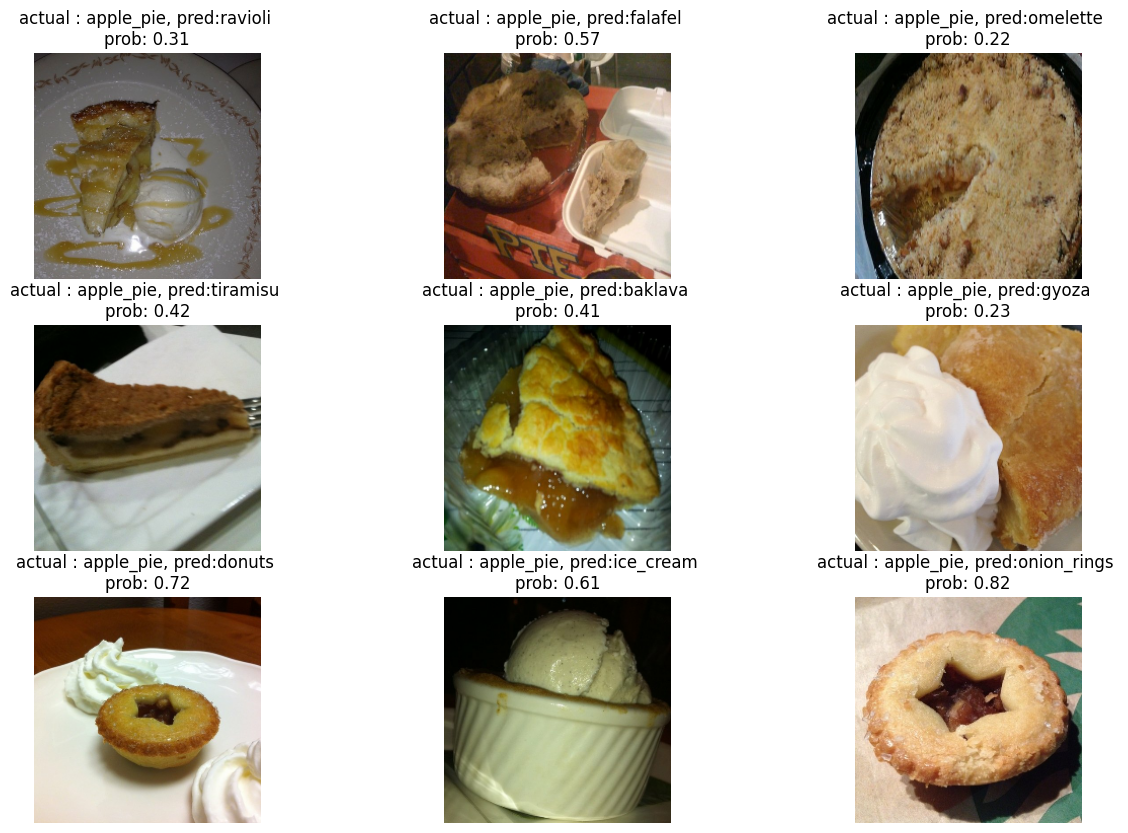

In [ ]:
images_to_view = 9
start_index = 10
plt.figure(figsize=(15,10))
for i,row in enumerate(m[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_pred_image(row[1], scale=True)
  _,_,_,_, pred_prob, y_true, y_pred, _ = row
  plt.imshow(img)
  plt.title(f"actual : {y_true}, pred:{y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)